In [4]:
# Parameters
vname = "temp"
model_name = "AWICM-3"
model_path = "/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"
reference_path = "/work/ab0246/a270092/postprocessing/climatologies/fdiag/"
reference_years = "1985"
model_start = 1990
model_end = 1991
remap_resolution = "180x91"
year=[model_start,model_end]
#remap_resolution = "180x91"
mesh_file = "mesh.nc"
meshpath = "/work/ab0246/a270092/input/fesom2/core2/"
out_path = "./output/"
dpi = 150
tripyview_path="/home/a/a270275/tripyview"
tripyview_path="/home/a/a270275/tripyview"
# parameters
#___Dask Client Parameters____________________________________________________________
do_papermill      = False
do_parallel       = True
parallel_tnprc    = 128                          # total number of available CPUs
parallel_nprc     = 72                           # number of dask workers
parallel_nprc_bin = parallel_tnprc-parallel_nprc # number of processor used to parallize the binning loop
parallel_tmem     = 200                          # max. available RAM

#___Mesh Path & Save Path_____________________________________________________________
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path         = '/work/ab0995/a270275/runconfig/Results/AWICM3_test031' #~/figures/test_papermill/'
save_fname        = None # filename from papermill come in through save_fname
tripyrun_name     = 'AWICM3_test018' # papermill workflow name of notebook 
tripyrun_analysis = None # papermill diagnostic driver
tripyrun_spath_nb = None # papermill path to processed notebooks
tripyrun_spath_fig= None # papermill path to processed figures

#___Data Path & Input Names___________________________________________________________
input_paths   = list()
input_paths.append('/work/ab0995/a270275/experiments/5Ymulti_diag/outdata/fesom/')


input_names   = list()
input_names.append('Fesom 2.6')
input_paths = ["/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"]
# n_cycl: which spinupcycle should be plottet if do_allcycl all spinupcycles from [1...n_cycle] are plottet, if None path is directly used
n_cycl    = None
do_allcycl= False


mon, day, record, box, depth = None, None, None, None, None

In [5]:
# Add the parent directory to sys.path and load config
import sys
import os
import pdb
print("tripypath",tripyview_path)
sys.path.append(tripyview_path)
from config import *

model_path = os.path.dirname(model_path)

# Mark as started
SCRIPT_NAME = "part9_rad_vs_ceres.ipynb"   #ADAPT
update_status(SCRIPT_NAME, " Started")


tripypath /home/a/a270275/tripyview


100%|██████████| 2/2 [00:00<00:00, 624.43it/s]

[                                        ] | 0% Completed | 101.14 ms

[########################################] | 100% Completed | 807.61 ms
(24, 19)


sh: convert: command not found
mv: cannot stat '_part9_qbo_wind_v_trimmed.png': No such file or directory


'\nclimatology_file = \'qbo_sel_zonmermean.nc\'\nERA5_CRF = cdo.copy(input=str(climatology_path)+\'/\'+str(climatology_file),returnArray=clim_var)\n\n\ndata_model = OrderedDict()\ndata_model_mean = OrderedDict()\n\ntitle2=\'ERA5 equatorial zonal wind evolution\'\n\n\nfor exp_name in input_names:\n    data_model[exp_name] = np.squeeze(ERA5_CRF) \n    data_model_mean[exp_name] = np.fliplr(data_model[exp_name])\n\nprint(np.shape(data_model_mean[exp_name]))\n\n\nnrows, ncol = define_rowscol(input_paths)\nfig, axes = plt.subplots(nrows=nrows, ncols=ncol, figsize=figsize)\nif isinstance(axes, np.ndarray):\n    axes = axes.flatten()\nelse:\n    axes = [axes]\ni = 0\n\nx = [100,92.5,85,70,60,50,40,30,25,20,15,10,7,5,3,2,1,0.5,0.1]\nx=np.asarray(x)\ntime = np.arange(1989, 2014, 0.0803)\n\n\nfor key in input_names:\n\n    axes[i]=plt.subplot(nrows,ncol,i+1)\n    imf=plt.contourf(time,x, data_model_mean[exp_name].T, cmap=plt.cm.PuOr_r, \n                     levels=levels, extend=\'both\',\n     

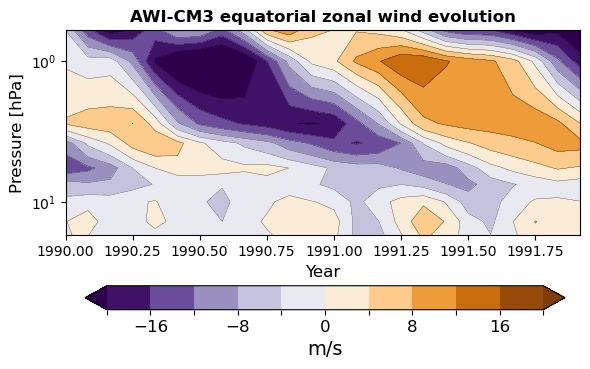

In [12]:

# parameters cell
input_paths = [model_path]
input_names = [model_name]
exps = list(range(model_start, model_end+1))
variables=['u','t']
res=[320, 160]
saved_filenames=[]
clim='ERA5'
out_path = save_path +  "/figures"
clim_var='U'
title='AWI-CM3 equatorial zonal wind evolution'
climatology_path =  observation_path+'/era5/netcdf/'
variable = 'u'
levels = np.linspace(-20, 20, 11)
levels2=np.linspace(-10,30,12)
labels='m/s'

figsize=(6, 3)

contour_outline_thickness = .2

# Set number of columns, in case of multiple variables
def define_rowscol(input_paths, columns=len(input_paths), reduce=0):
    number_paths = len(input_paths) - reduce
#     columns = columns
    if number_paths < columns:
        ncol = number_paths
    else:
        ncol = columns
    nrows = math.ceil(number_paths / columns)
    return [nrows, ncol]

# Calculate Root Mean Square Deviation (RMSD)
def rmsd(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Mean Deviation
def md(predictions, targets):
    return (predictions - targets).mean()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import Locator
class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh, nints=10):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically. nints gives the number of
        intervals that will be bounded by the minor ticks.
        """
        self.linthresh = linthresh
        self.nintervals = nints

    def __call__(self):
        # Return the locations of the ticks
        majorlocs = self.axis.get_majorticklocs()

        if len(majorlocs) == 1:
            return self.raise_if_exceeds(np.array([]))

        # add temporary major tick locs at either end of the current range
        # to fill in minor tick gaps
        dmlower = majorlocs[1] - majorlocs[0]    # major tick difference at lower end
        dmupper = majorlocs[-1] - majorlocs[-2]  # major tick difference at upper end

        # add temporary major tick location at the lower end
        if majorlocs[0] != 0. and ((majorlocs[0] != self.linthresh and dmlower > self.linthresh) or (dmlower == self.linthresh and majorlocs[0] < 0)):
            majorlocs = np.insert(majorlocs, 0, majorlocs[0]*10.)
        else:
            majorlocs = np.insert(majorlocs, 0, majorlocs[0]-self.linthresh)

        # add temporary major tick location at the upper end
        if majorlocs[-1] != 0. and ((np.abs(majorlocs[-1]) != self.linthresh and dmupper > self.linthresh) or (dmupper == self.linthresh and majorlocs[-1] > 0)):
            majorlocs = np.append(majorlocs, majorlocs[-1]*10.)
        else:
            majorlocs = np.append(majorlocs, majorlocs[-1]+self.linthresh)

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in xrange(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = self.nintervals
            else:
                ndivs = self.nintervals - 1.

            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                          '%s type.' % type(self))

        
# Load model Data
def load_parallel(variable,path):
    data1 = cdo.zonmean(input="-mermean -sellonlatbox,0,360,-10,10 "+str(path),returnArray=variable)
    return data1

data = OrderedDict()
for exp_path, exp_name  in zip(input_paths, input_names):
    data[exp_name] = {}
    for variable in variable:
        datat = []
        t = []
        temporary = []
        for exp in tqdm(exps):

            path = exp_path+'/oifs/atm_remapped_1m_pl_'+variable+'_1m_pl_'+f'{exp:04d}-{exp:04d}.nc'
            temporary = dask.delayed(load_parallel)(variable,path)
            t.append(temporary)

        with ProgressBar():
            datat = dask.compute(*t, scheduler='threads')
        data[exp_name][variable] = np.squeeze(datat)
        
data_model = OrderedDict()
data_model_mean = OrderedDict()


for exp_name in input_names:
    data_model[exp_name] = np.squeeze(data[exp_name][variable]) 
    data_model_mean[exp_name] = data[exp_name][variable].reshape(np.shape(data[exp_name][variable])[0]*np.shape(data[exp_name][variable])[1],np.shape(data[exp_name][variable])[2])

print(np.shape(data_model_mean[exp_name]))


nrows, ncol = define_rowscol(input_paths)
fig, axes = plt.subplots(nrows=nrows, ncols=ncol, figsize=figsize)
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]
i = 0

x = [100,92.5,85,70,60,50,40,30,25,20,15,10,7,5,3,2,1,0.5,0.1]
x=np.asarray(x)
time = np.arange(model_start, model_end+1, 0.0834)


for key in input_names:

    axes[i]=plt.subplot(nrows,ncol,i+1)
    imf=plt.contourf(time,x, data_model_mean[exp_name].T, cmap=plt.cm.PuOr_r, 
                     levels=levels, extend='both',
                     zorder=1)
    line_colors = ['black' for l in imf.levels]
    imc=plt.contour(time,x, data_model_mean[exp_name].T, colors=line_colors, 
                    levels=levels, linewidths=contour_outline_thickness,
                    zorder=2)

    axes[i].set_ylabel('Pressure [hPa]',fontsize=12)
    axes[i].set_xlabel('Year',fontsize=12)
    
    axes[i].set_title(title,fontweight="bold")
    axes[i].set_yscale('symlog')
    axes[i].invert_yaxis()
    axes[i].set(ylim=[20, 0.5])

    plt.tight_layout() 

    i = i+1
    
    cbar_ax_abs = fig.add_axes([0.15, -0.05, 0.8, 0.08])
    cbar_ax_abs.tick_params(labelsize=12)
    cb = fig.colorbar(imf, cax=cbar_ax_abs, orientation='horizontal',ticks=levels)
    cb.set_label(label=labels, size='14')
    cb.ax.tick_params(labelsize='12')
    #plt.text(5, 168, r'rmsd='+str(round(rmsdval,3)))
    #plt.text(-7.5, 168, r'bias='+str(round(mdval,3)))
    
for label in cb.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

    
ofile='_part12_qbo_wind_v'
    
if ofile is not None:
    plt.savefig(out_path+"/"+tripyrun_name +ofile, dpi=dpi,bbox_inches='tight')
    saved_filenames.append(out_path+ofile)
    
# Load ERA5 reanalysis data
'''
climatology_file = 'qbo_sel_zonmermean.nc'
ERA5_CRF = cdo.copy(input=str(climatology_path)+'/'+str(climatology_file),returnArray=clim_var)


data_model = OrderedDict()
data_model_mean = OrderedDict()

title2='ERA5 equatorial zonal wind evolution'


for exp_name in input_names:
    data_model[exp_name] = np.squeeze(ERA5_CRF) 
    data_model_mean[exp_name] = np.fliplr(data_model[exp_name])

print(np.shape(data_model_mean[exp_name]))


nrows, ncol = define_rowscol(input_paths)
fig, axes = plt.subplots(nrows=nrows, ncols=ncol, figsize=figsize)
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]
i = 0

x = [100,92.5,85,70,60,50,40,30,25,20,15,10,7,5,3,2,1,0.5,0.1]
x=np.asarray(x)
time = np.arange(1989, 2014, 0.0803)


for key in input_names:

    axes[i]=plt.subplot(nrows,ncol,i+1)
    imf=plt.contourf(time,x, data_model_mean[exp_name].T, cmap=plt.cm.PuOr_r, 
                     levels=levels, extend='both',
                     zorder=1)
    line_colors = ['black' for l in imf.levels]
    imc=plt.contour(time,x, data_model_mean[exp_name].T, colors=line_colors, 
                    levels=levels, linewidths=contour_outline_thickness,
                    zorder=2)

    axes[i].set_ylabel('Pressure [hPa]',fontsize=12)
    axes[i].set_xlabel('Year',fontsize=12)
    
    axes[i].set_title(title2,fontweight="bold")
    axes[i].set_yscale('symlog')
    axes[i].invert_yaxis()
    axes[i].set(ylim=[20, 0.5])

    plt.tight_layout() 

    i = i+1
    
    cbar_ax_abs = fig.add_axes([0.15, -0.05, 0.8, 0.08])
    cbar_ax_abs.tick_params(labelsize=12)
    cb = fig.colorbar(imf, cax=cbar_ax_abs, orientation='horizontal',ticks=levels)
    cb.set_label(label=labels, size='14')
    cb.ax.tick_params(labelsize='12')
    #plt.text(5, 168, r'rmsd='+str(round(rmsdval,3)))
    #plt.text(-7.5, 168, r'bias='+str(round(mdval,3)))
    
for label in cb.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

    
ofile='ERA5-qbo.png'
    
if ofile is not None:
    plt.savefig(out_path+ofile, dpi=dpi,bbox_inches='tight')
    saved_filenames.append(out_path+ofile)
# Mark script as completed
update_status(SCRIPT_NAME, "Completed")
'''

In [11]:
name=out_path+"/"+tripyrun_name +ofile
name

'/work/ab0995/a270275/runconfig/Results/AWICM3_test031/figures/AWICM3_test018part9_qtbo_wind_v'